# Objective: 
   Apply 3 different architecture(2 layers/3 layers/5 layers) on MNIST dataset. for each do the below.
   1. use RELU and Adam optimizer
   2. try dropout and BN
   3. for all please plot epoch vs train/test loss

In [64]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 26s 2us/step


In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [5]:
# if you observe the input shape its 3 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [6]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [7]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [8]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [9]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 

In [10]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

# 2 Layer Architecture(Input-256-120-Output)

### MLP-RELU-ADAM

In [47]:
# input-256-120-output

# Multilayer perceptron

model_relu = Sequential()
model_relu.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer='he_normal'))
model_relu.add(Dense(120, activation='relu', kernel_initializer='he_normal'))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_27 (Dense)             (None, 120)               30840     
_________________________________________________________________
dense_28 (Dense)             (None, 10)                1210      
Total params: 233,010
Trainable params: 233,010
Non-trainable params: 0
_________________________________________________________________


In [48]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 109us/step - loss: 0.2692 - acc: 0.9228 - val_loss: 0.1298 - val_acc: 0.9616
Epoch 2/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.1036 - acc: 0.9687 - val_loss: 0.0974 - val_acc: 0.9711
Epoch 3/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.0690 - acc: 0.9788 - val_loss: 0.0798 - val_acc: 0.9757
Epoch 4/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.0495 - acc: 0.9844 - val_loss: 0.0707 - val_acc: 0.9785
Epoch 5/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.0364 - acc: 0.9886 - val_loss: 0.0771 - val_acc: 0.9765
Epoch 6/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.0275 - acc: 0.9912 - val_loss: 0.0841 - val_acc: 0.9748
Epoch 7/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.0203 - acc: 0.9937 - val_loss: 0.0797 - val_ac

Test score: 0.10407041775044791
Test accuracy: 0.9787


<IPython.core.display.Javascript object>


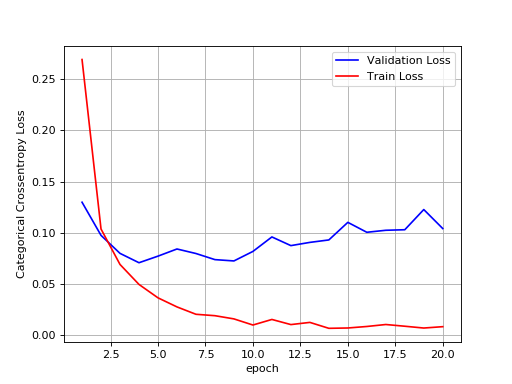

In [49]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# Observation: 

we are overfitting here. because after 5 epochs train-loss and test-loss are moving opposite direction to eachother.so Either we can stop before 5 epoch or try with regulization to reduce overfitting.
Let's try to add L2 Regulizer here and check the performance.

In [43]:
# input-256-120-output

# Multilayer perceptron
from keras import regularizers
model_relu = Sequential()
model_relu.add(Dense(256, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01), input_shape=(input_dim,)))
model_relu.add(Dense(120, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01)))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_24 (Dense)             (None, 120)               30840     
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1210      
Total params: 233,010
Trainable params: 233,010
Non-trainable params: 0
_________________________________________________________________


In [44]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 87us/step - loss: 1.6086 - acc: 0.8921 - val_loss: 0.5827 - val_acc: 0.9213
Epoch 2/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.5307 - acc: 0.9251 - val_loss: 0.4930 - val_acc: 0.9257
Epoch 3/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.4707 - acc: 0.9324 - val_loss: 0.4277 - val_acc: 0.9425
Epoch 4/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.4316 - acc: 0.9386 - val_loss: 0.3943 - val_acc: 0.9450
Epoch 5/20
60000/60000 [==============================] - 4s 75us/step - loss: 0.4032 - acc: 0.9419 - val_loss: 0.3785 - val_acc: 0.9506
Epoch 6/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.3783 - acc: 0.9471 - val_loss: 0.3586 - val_acc: 0.9481
Epoch 7/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.3606 - acc: 0.9493 - val_loss: 0.3492 - val_ac

Test score: 0.27358412804603577
Test accuracy: 0.9565


<IPython.core.display.Javascript object>


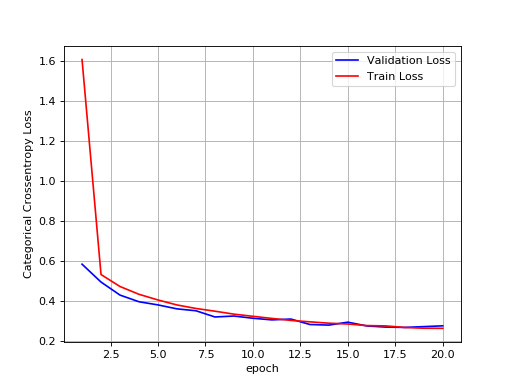

In [45]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


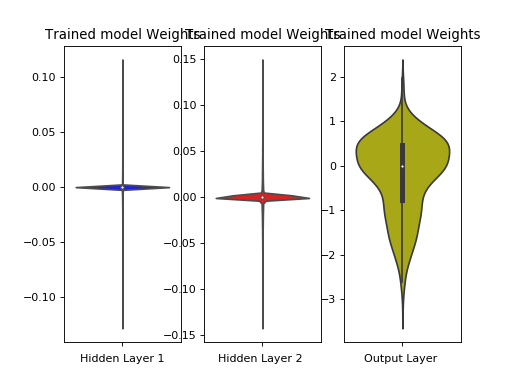

In [46]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# MLP-RELU-ADAM- BatchNormalization-Dropout

In [53]:
# input-256-120-output
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
# Multilayer perceptron
from keras import regularizers
model_relu = Sequential()
model_relu.add(Dense(256, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01), input_shape=(input_dim,)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(120, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 120)               30840     
_________________________________________________________________
batch_normalization_4 (Batch (None, 120)               480       
_________________________________________________________________
dropout_4 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 10)                1210      
Total para

In [54]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 135us/step - loss: 2.7921 - acc: 0.8429 - val_loss: 0.7609 - val_acc: 0.9444
Epoch 2/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.6535 - acc: 0.9141 - val_loss: 0.4629 - val_acc: 0.9413
Epoch 3/20
60000/60000 [==============================] - 8s 135us/step - loss: 0.5326 - acc: 0.9174 - val_loss: 0.4146 - val_acc: 0.9477
Epoch 4/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.5058 - acc: 0.9190 - val_loss: 0.4199 - val_acc: 0.9433
Epoch 5/20
60000/60000 [==============================] - 7s 125us/step - loss: 0.4851 - acc: 0.9224 - val_loss: 0.3798 - val_acc: 0.9526
Epoch 6/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.4763 - acc: 0.9216 - val_loss: 0.3757 - val_acc: 0.9502
Epoch 7/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.4746 - acc: 0.9204 - val_loss: 0.3552 - 

Test score: 0.32680672187805176
Test accuracy: 0.9525


<IPython.core.display.Javascript object>


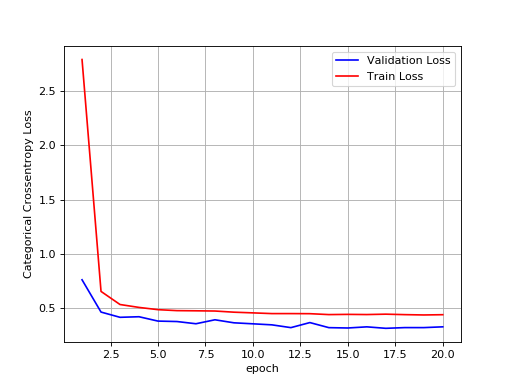

In [55]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# 3 Layer Architecture(Input - 512 - 256 - 120 - Output)¶

In [57]:
# input-256-120-output
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
# Multilayer perceptron
from keras import regularizers
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01), input_shape=(input_dim,)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(256, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(120, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_5 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_6 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 120)               30840     
__________

In [58]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 20s 337us/step - loss: 5.8976 - acc: 0.8243 - val_loss: 1.3460 - val_acc: 0.9261
Epoch 2/20
60000/60000 [==============================] - 17s 278us/step - loss: 0.9561 - acc: 0.9079 - val_loss: 0.6529 - val_acc: 0.9444
Epoch 3/20
60000/60000 [==============================] - 16s 274us/step - loss: 0.7228 - acc: 0.9123 - val_loss: 0.6683 - val_acc: 0.9184
Epoch 4/20
60000/60000 [==============================] - 16s 273us/step - loss: 0.6732 - acc: 0.9146 - val_loss: 0.5537 - val_acc: 0.9482
Epoch 5/20
60000/60000 [==============================] - 16s 272us/step - loss: 0.6651 - acc: 0.9127 - val_loss: 0.5203 - val_acc: 0.9501
Epoch 6/20
60000/60000 [==============================] - 17s 280us/step - loss: 0.6437 - acc: 0.9129 - val_loss: 0.5104 - val_acc: 0.9423
Epoch 7/20
60000/60000 [==============================] - 19s 310us/step - loss: 0.6283 - acc: 0.9123 - val_loss: 0.

Test score: 0.44660081958770753
Test accuracy: 0.9461


<IPython.core.display.Javascript object>


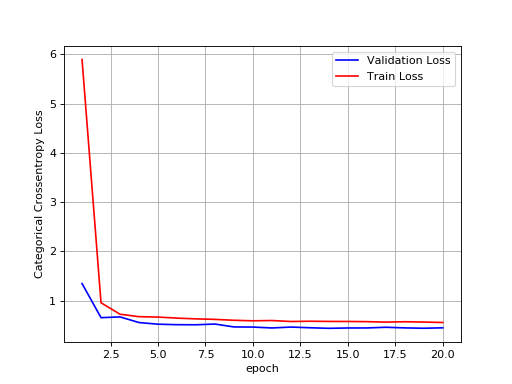

In [59]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# 5 Layer Architecture(Input - 512 - 400 - 300 - 256 - 120 - Output)

In [61]:
# input-256-120-output
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
# Multilayer perceptron
from keras import regularizers
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01), input_shape=(input_dim,)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(400, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01), input_shape=(input_dim,)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(300, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01), input_shape=(input_dim,)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(256, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(120, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_8 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 400)               205200    
_________________________________________________________________
batch_normalization_9 (Batch (None, 400)               1600      
_________________________________________________________________
dropout_9 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 300)               120300    
__________

In [62]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 33s 543us/step - loss: 13.2808 - acc: 0.7269 - val_loss: 3.2182 - val_acc: 0.9058
Epoch 2/20
60000/60000 [==============================] - 25s 421us/step - loss: 1.6860 - acc: 0.8978 - val_loss: 1.0114 - val_acc: 0.9313
Epoch 3/20
60000/60000 [==============================] - 26s 439us/step - loss: 1.0329 - acc: 0.9011 - val_loss: 0.8121 - val_acc: 0.9443
Epoch 4/20
60000/60000 [==============================] - 29s 480us/step - loss: 0.9598 - acc: 0.9010 - val_loss: 0.8698 - val_acc: 0.9252
Epoch 5/20
60000/60000 [==============================] - 27s 454us/step - loss: 0.9367 - acc: 0.9020 - val_loss: 0.7624 - val_acc: 0.9481
Epoch 6/20
60000/60000 [==============================] - 27s 453us/step - loss: 0.9143 - acc: 0.9020 - val_loss: 0.7643 - val_acc: 0.9374
Epoch 7/20
60000/60000 [==============================] - 24s 406us/step - loss: 0.9128 - acc: 0.8990 - val_loss: 0

Test score: 0.6642274143218995
Test accuracy: 0.9424


<IPython.core.display.Javascript object>


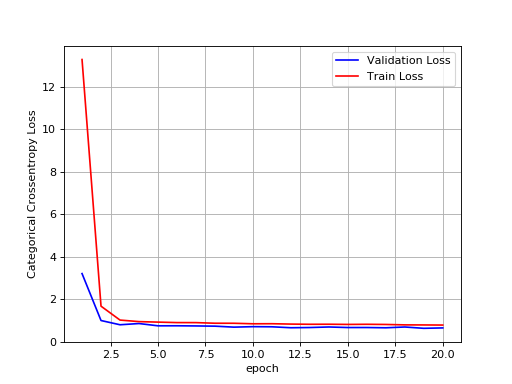

In [63]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# TensorFlow Implementation:

In [78]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [80]:
def plt_dynamic(x, y, y_1, ax, ticks,title, colors=['b']):
    ax.plot(x, y, 'b', label="Train Loss")
    ax.plot(x, y_1, 'r', label="Test Loss")
    if len(x)==1:
        plt.legend()
        plt.title(title)
    plt.yticks(ticks)
    fig.canvas.draw()

# 2 Layer Architecture(Input-256-120-Output)


### Initialization

In [67]:
import tensorflow as tf
# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 120 # 2nd layer number of neurons
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

In [68]:
# x isn't a specific value. It's a placeholder, a value that we'll input when we ask TensorFlow to run a computation.
# We want to be able to input any number of MNIST images, each flattened into a 784-dimensional vector. 
# We represent this as a 2-D tensor of floating-point numbers, with a shape X = [None, 784]. 
# (Here None means that a dimension can be of any length.)
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

# keep_prob: we will be using these placeholders when we use dropouts, while testing model
keep_prob = tf.placeholder(tf.float32)
# keep_prob_input: we will be using these placeholders when we use dropouts, while training model
keep_prob_input = tf.placeholder(tf.float32)

In [72]:
weights_relu = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1],stddev=0.088, mean=0)),    #784x256
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2],stddev=0.128, mean=0)), #256x120
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes],stddev=0.120, mean=0))  #120x10
}

In [73]:
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),             #256x1
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),             #120x1
    'out': tf.Variable(tf.random_normal([n_classes]))              #10x1
}

In [75]:
# Parameters
training_epochs = 15
learning_rate = 0.001
batch_size = 100
display_step = 1

In [82]:
# https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/multi_layer_perceptron_mnist.html
# Create model
def multilayer_perceptron_relu(x, weights, biases):
    # Use tf.matmul instead of "*" because tf.matmul can change it's dimensions on the fly (broadcast)
    print( 'x:', x.get_shape(), 'W[h1]:', weights['h1'].get_shape(), 'b[h1]:', biases['b1'].get_shape())        
    
    # Hidden layer with Sigmoid activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1']) #(x*weights['h1']) + biases['b1']
    layer_1 = tf.nn.relu(layer_1)
    print( 'layer_1:', layer_1.get_shape(), 'W[h2]:', weights['h2'].get_shape(), 'b[h2]:', biases['b2'].get_shape())        
    
    # Hidden layer with Sigmoid activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']) # (layer_1 * weights['h2']) + biases['b2'] 
    layer_2 = tf.nn.relu(layer_2)
    print( 'layer_2:', layer_2.get_shape(), 'W[out]:', weights['out'].get_shape(), 'b[out]:', biases['out'].get_shape())        
    
    # Output layer with Sigmoid activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out'] # (layer_2 * weights['out']) + biases['out']    
    out_layer = tf.nn.relu(out_layer)
    print('out_layer:',out_layer.get_shape())

    return out_layer

x: (?, 784) W[h1]: (784, 256) b[h1]: (256,)
layer_1: (?, 256) W[h2]: (256, 120) b[h2]: (120,)
layer_2: (?, 120) W[out]: (120, 10) b3: (10,)
out_layer: (?, 10)


<IPython.core.display.Javascript object>


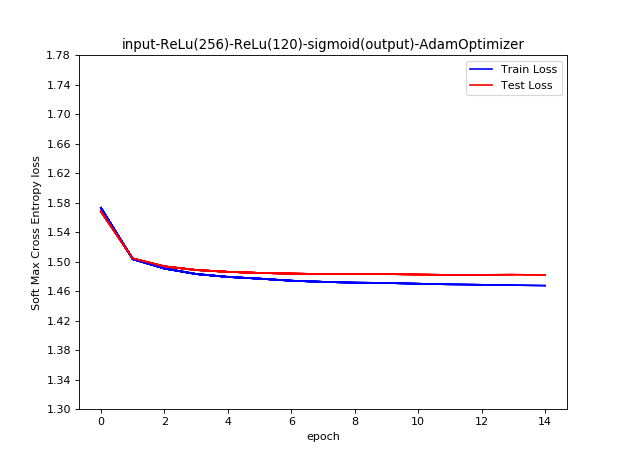

Epoch: 0001 train cost=1.573004804 test cost=1.568143620
Epoch: 0002 train cost=1.503650998 test cost=1.504529602
Epoch: 0003 train cost=1.490899708 test cost=1.493798215
Epoch: 0004 train cost=1.483453152 test cost=1.488881329
Epoch: 0005 train cost=1.479526362 test cost=1.486393936
Epoch: 0006 train cost=1.477169566 test cost=1.484910898
Epoch: 0007 train cost=1.474384593 test cost=1.484027963
Epoch: 0008 train cost=1.472842626 test cost=1.483389878
Epoch: 0009 train cost=1.471719372 test cost=1.483417801
Epoch: 0010 train cost=1.471333122 test cost=1.483420694
Epoch: 0011 train cost=1.470284496 test cost=1.482793900
Epoch: 0012 train cost=1.469497443 test cost=1.482183111
Epoch: 0013 train cost=1.468833386 test cost=1.482279700
Epoch: 0014 train cost=1.468528031 test cost=1.482582616
Epoch: 0015 train cost=1.467727938 test cost=1.482009680
Accuracy: 0.9778


In [83]:
# Since we are using Relu activations in hiden layers we will be using weights that are initalized as weights_relu
yrelu = multilayer_perceptron_relu(x, weights_relu, biases)

# https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits
cost_relu = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = yrelu, labels = y_))
# https://github.com/amitmac/Question-Answering/issues/2
# there are many optimizers available: https://www.tensorflow.org/versions/r1.2/api_guides/python/train#Optimizers 
optimizer_relu_adam = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_relu)

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') ; ax.set_ylabel('Soft Max Cross Entropy loss')
    xs, ytrs, ytes = [], [], []
    for epoch in range(training_epochs):
        train_avg_cost = 0.
        test_avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)

        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)

            # here we use AdamOptimizer
            _, c, w = sess.run([optimizer_relu_adam, cost_relu, weights_relu], feed_dict={x: batch_xs, y_: batch_ys})
            train_avg_cost += c / total_batch
            c = sess.run(cost_relu, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
            test_avg_cost += c / total_batch

        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)
        plt_dynamic(xs, ytrs, ytes, ax, np.arange(1.3, 1.8, step=0.04), "input-ReLu(256)-ReLu(120)-sigmoid(output)-AdamOptimizer")

        if epoch%display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))

    # plot final results
    plt_dynamic(xs, ytrs, ytes, ax,np.arange(1.3, 1.8, step=0.04), "input-ReLu(256)-ReLu(120)-sigmoid(output)-AdamOptimizer")

    # we are calculating the final accuracy on the test data
    correct_prediction = tf.equal(tf.argmax(yrelu,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y_: mnist.test.labels}))

# 2 Layer Architecture(Input-256-120-Output) with BN and Dropout:

In [84]:
# https://www.tensorflow.org/api_docs/python/tf/nn/batch_normalization
# https://r2rt.com/implementing-batch-normalization-in-tensorflow.html
epsilon = 1e-3
def multilayer_perceptron_batch_dropout(x, weights, biases):
    # Use tf.matmul instead of "*" because tf.matmul can change it's dimensions on the fly (broadcast)
    print( 'x:', x.get_shape(), 'W[h1]:', weights['h1'].get_shape(), 'b[h1]:', biases['b1'].get_shape())        
    
    ############################################################
    # Hidden layer with Sigmoid activation and batch normalization
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1']) #(x*weights['h1']) + biases['b1']
    
    # https://www.tensorflow.org/api_docs/python/tf/nn/moments
    # Calculate the mean and variance of x.
    batch_mean_1, batch_var_1 = tf.nn.moments(layer_1,[0])
    
    scale_1 = tf.Variable(tf.ones([n_hidden_1]))
    beta_1 = tf.Variable(tf.zeros([n_hidden_1]))
    
    # https://www.tensorflow.org/api_docs/python/tf/nn/batch_normalization
    layer_1 = tf.nn.batch_normalization(layer_1, batch_mean_1, batch_var_1, beta_1, scale_1, epsilon)
    layer_1 = tf.nn.relu(layer_1)
    
    print( 'layer_1:', layer_1.get_shape(), 'W[h2]:', weights['h2'].get_shape(), 'b[h2]:', biases['b2'].get_shape())        
    
    layer_1_drop = tf.nn.dropout(layer_1, keep_prob)
    #####################################################################################
    
    # Hidden layer with Sigmoid activation and batch normalization
    layer_2 = tf.add(tf.matmul(layer_1_drop, weights['h2']), biases['b2']) # (layer_1 * weights['h2']) + biases['b2'] 
    
    # https://www.tensorflow.org/api_docs/python/tf/nn/moments
    # Calculate the mean and variance of x.
    batch_mean_2, batch_var_2 = tf.nn.moments(layer_2, [0])
    
    scale_2 = tf.Variable(tf.ones([n_hidden_2]))
    beta_2 = tf.Variable(tf.zeros([n_hidden_2]))
    
    layer_2 = tf.nn.batch_normalization(layer_2, batch_mean_2, batch_var_2, beta_2, scale_2, epsilon)
    layer_2 = tf.nn.relu(layer_2)
    print( 'layer_2:', layer_2.get_shape(), 'W[out]:', weights['out'].get_shape(), 'b3:', biases['out'].get_shape())        
    layer_2_drop = tf.nn.dropout(layer_2, keep_prob)
    ######################################################################################
    
    # output layer with Sigmoid activation 
    out_layer = tf.matmul(layer_2_drop, weights['out']) + biases['out'] # (layer_2 * weights['out']) + biases['out']    
    out_layer = tf.nn.relu(out_layer)
    print('out_layer:',out_layer.get_shape())

    return out_layer

x: (?, 784) W[h1]: (784, 256) b[h1]: (256,)
layer_1: (?, 256) W[h2]: (256, 120) b[h2]: (120,)
layer_2: (?, 120) W[out]: (120, 10) b3: (10,)
out_layer: (?, 10)


<IPython.core.display.Javascript object>


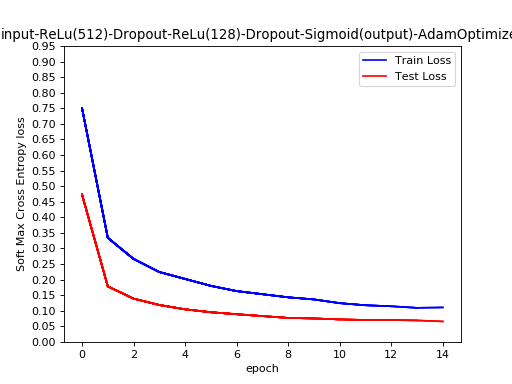

Epoch: 0001 train cost=0.750573016 test cost=0.472782250
Epoch: 0002 train cost=0.333973266 test cost=0.177956570
Epoch: 0003 train cost=0.266030923 test cost=0.138520628
Epoch: 0004 train cost=0.224104328 test cost=0.118139506
Epoch: 0005 train cost=0.201799320 test cost=0.104251079
Epoch: 0006 train cost=0.179573741 test cost=0.094857746
Epoch: 0007 train cost=0.162775747 test cost=0.088443358
Epoch: 0008 train cost=0.152817533 test cost=0.082527174
Epoch: 0009 train cost=0.142769274 test cost=0.076563815
Epoch: 0010 train cost=0.136015034 test cost=0.074911221
Epoch: 0011 train cost=0.124042046 test cost=0.071768868
Epoch: 0012 train cost=0.117291935 test cost=0.070012599
Epoch: 0013 train cost=0.114056340 test cost=0.069966537
Epoch: 0014 train cost=0.108946447 test cost=0.068521579
Epoch: 0015 train cost=0.110305238 test cost=0.065365668
Accuracy: 0.9799


In [89]:
# Since we are using Relu activations in hiden layers we will be using weights that are initalized as weights_relu
ybatchdrop = multilayer_perceptron_batch_dropout(x, weights_relu, biases)

# https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits
cost_batch_drop = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = ybatchdrop, labels = y_))
# https://github.com/amitmac/Question-Answering/issues/2
# there are many optimizers available: https://www.tensorflow.org/versions/r1.2/api_guides/python/train#Optimizers 
optimizer_batch_drop_adam = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_batch_drop)

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') ; ax.set_ylabel('Soft Max Cross Entropy loss')
    xs, ytrs, ytes = [], [], []
    for epoch in range(training_epochs):
        train_avg_cost = 0.
        test_avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)

        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            
            # here we use AdamOptimizer
            _, c, w = sess.run([optimizer_batch_drop_adam, cost_batch_drop, weights_relu], feed_dict={x: batch_xs, y_: batch_ys, keep_prob: 0.5})
            train_avg_cost += c / total_batch
            c = sess.run(cost_batch_drop, feed_dict={x: mnist.test.images, y_: mnist.test.labels,  keep_prob: 1.0})
            test_avg_cost += c / total_batch

        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)
        plt_dynamic(xs, ytrs, ytes, ax,np.arange(0, 1, step=0.05), "input-ReLu(512)-Dropout-ReLu(128)-Dropout-Sigmoid(output)-AdamOptimizer")

        if epoch%display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))

    # plot final results
    plt_dynamic(xs, ytrs, ytes, ax,np.arange(0, 1, step=0.05), "input-ReLu(512)-Dropout-ReLu(128)-Dropout-Sigmoid(output)-AdamOptimizer")

    # we are calculating the final accuracy on the test data
    correct_prediction = tf.equal(tf.argmax(ybatchdrop,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0 }))

# 3 Layer Architecture(Input - 512 - 256 - 120 - Output)

In [96]:
# Network Parameters
n_hidden_1 = 512 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
n_hidden_3 = 120 # 3rd layer number of neurons
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

In [102]:
weights_relu = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1],stddev=0.05, mean=0)),    #784x512
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2],stddev=0.062, mean=0)), #512x256
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3],stddev=0.088, mean=0)), #256x120
    'out': tf.Variable(tf.random_normal([n_hidden_3, n_classes],stddev=0.128, mean=0))  #120x10
}

In [103]:
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),             #512x1
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),             #256x1
    'b3': tf.Variable(tf.random_normal([n_hidden_3])),             #120x1
    'out': tf.Variable(tf.random_normal([n_classes]))              #10x1
}

In [104]:
# Parameters
training_epochs = 15
learning_rate = 0.001
batch_size = 100
display_step = 1

In [105]:
# https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/multi_layer_perceptron_mnist.html
# Create model
def multilayer_perceptron_relu(x, weights, biases):
    # Use tf.matmul instead of "*" because tf.matmul can change it's dimensions on the fly (broadcast)
    print( 'x:', x.get_shape(), 'W[h1]:', weights['h1'].get_shape(), 'b[h1]:', biases['b1'].get_shape())        
    
    # Hidden layer with ReLu activation
    # https://en.wikipedia.org/wiki/Rectifier_(neural_networks)
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1']) #(x*weights['h1']) + biases['b1']
    layer_1 = tf.nn.relu(layer_1)
    print( 'layer_1:', layer_1.get_shape(), 'W[h2]:', weights['h2'].get_shape(), 'b[h2]:', biases['b2'].get_shape())        
    
    # Hidden layer with ReLu activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']) # (layer_1 * weights['h2']) + biases['b2'] 
    layer_2 = tf.nn.relu(layer_2)
    print( 'layer_2:', layer_2.get_shape(), 'W[h3]:', weights['out'].get_shape(), 'b[h3]:', biases['out'].get_shape())
    
    # Hidden layer with ReLu activation
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3']) # (layer_1 * weights['h2']) + biases['b2'] 
    layer_3 = tf.nn.relu(layer_3)
    print( 'layer_3:', layer_3.get_shape(), 'W[out]:', weights['out'].get_shape(), 'b[out]:', biases['out'].get_shape())  
    
    # Output layer with Sigmoid activation
    out_layer = tf.matmul(layer_3, weights['out']) + biases['out'] # (layer_2 * weights['out']) + biases['out']    
    out_layer = tf.nn.sigmoid(out_layer)
    print('out_layer:',out_layer.get_shape())

    return out_layer

x: (?, 784) W[h1]: (784, 512) b[h1]: (512,)
layer_1: (?, 512) W[h2]: (512, 256) b[h2]: (256,)
layer_2: (?, 256) W[h3]: (120, 10) b[h3]: (10,)
layer_3: (?, 120) W[out]: (120, 10) b[out]: (10,)
out_layer: (?, 10)


<IPython.core.display.Javascript object>


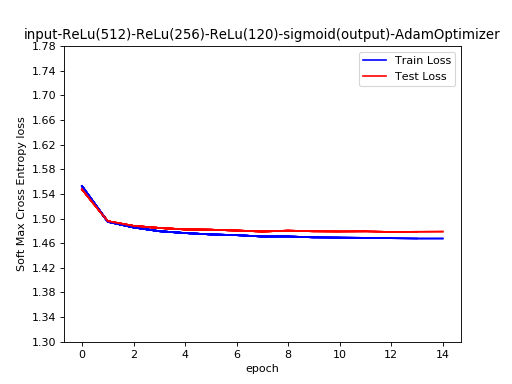

Epoch: 0001 train cost=1.552661473 test cost=1.547523995
Epoch: 0002 train cost=1.494764608 test cost=1.495693435
Epoch: 0003 train cost=1.485584267 test cost=1.488044170
Epoch: 0004 train cost=1.479495336 test cost=1.484727209
Epoch: 0005 train cost=1.476461210 test cost=1.482384140
Epoch: 0006 train cost=1.474246445 test cost=1.481890459
Epoch: 0007 train cost=1.473058529 test cost=1.480563509
Epoch: 0008 train cost=1.470863648 test cost=1.478953464
Epoch: 0009 train cost=1.470940045 test cost=1.480371903
Epoch: 0010 train cost=1.469467833 test cost=1.479328223
Epoch: 0011 train cost=1.469067101 test cost=1.479034901
Epoch: 0012 train cost=1.468656202 test cost=1.479279040
Epoch: 0013 train cost=1.468178506 test cost=1.478165637
Epoch: 0014 train cost=1.467580384 test cost=1.478534991
Epoch: 0015 train cost=1.467599000 test cost=1.478846595
Accuracy: 0.9777


In [106]:
# Since we are using Relu activations in hiden layers we will be using weights that are initalized as weights_relu
yrelu = multilayer_perceptron_relu(x, weights_relu, biases)

# https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits
cost_relu = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = yrelu, labels = y_))
# https://github.com/amitmac/Question-Answering/issues/2
# there are many optimizers available: https://www.tensorflow.org/versions/r1.2/api_guides/python/train#Optimizers 
optimizer_relu_adam = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_relu)

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') ; ax.set_ylabel('Soft Max Cross Entropy loss')
    xs, ytrs, ytes = [], [], []
    for epoch in range(training_epochs):
        train_avg_cost = 0.
        test_avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)

        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)

            # here we use AdamOptimizer
            _, c, w = sess.run([optimizer_relu_adam, cost_relu, weights_relu], feed_dict={x: batch_xs, y_: batch_ys})
            train_avg_cost += c / total_batch
            c = sess.run(cost_relu, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
            test_avg_cost += c / total_batch

        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)
        plt_dynamic(xs, ytrs, ytes, ax, np.arange(1.3, 1.8, step=0.04), "input-ReLu(512)-ReLu(256)-ReLu(120)-sigmoid(output)-AdamOptimizer")

        if epoch%display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))

    # plot final results
    plt_dynamic(xs, ytrs, ytes, ax,np.arange(1.3, 1.8, step=0.04), "input-ReLu(512)-ReLu(256)-ReLu(120)-sigmoid(output)-AdamOptimizer")

    # we are calculating the final accuracy on the test data
    correct_prediction = tf.equal(tf.argmax(yrelu,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y_: mnist.test.labels}))

# 5 Layer Architecture(Input - 512 - 400 - 300 - 256 - 120 - Output)

In [109]:
# Network Parameters
n_hidden_1 = 512 # 1st layer number of neurons
n_hidden_2 = 400 # 2nd layer number of neurons
n_hidden_3 = 300 # 3rd layer number of neurons
n_hidden_4 = 256 # 4th layer number of neurons
n_hidden_5 = 120 # 5th layer number of neurons
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

In [110]:
weights_relu = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1],stddev=0.05, mean=0)),    #784x512
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2],stddev=0.062, mean=0)), #512x400
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3],stddev=0.088, mean=0)), #400x300
    'h4': tf.Variable(tf.random_normal([n_hidden_3, n_hidden_4],stddev=0.088, mean=0)), #300x256
    'h5': tf.Variable(tf.random_normal([n_hidden_4, n_hidden_5],stddev=0.088, mean=0)), #256x120
    'out': tf.Variable(tf.random_normal([n_hidden_5, n_classes],stddev=0.128, mean=0))  #120x10
}

In [111]:
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),             #512x1
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),             #400x1
    'b3': tf.Variable(tf.random_normal([n_hidden_3])),             #300x1
    'b4': tf.Variable(tf.random_normal([n_hidden_4])),             #256x1
    'b5': tf.Variable(tf.random_normal([n_hidden_5])),             #120x1
    'out': tf.Variable(tf.random_normal([n_classes]))              #10x1
}

In [117]:
# https://www.tensorflow.org/api_docs/python/tf/nn/batch_normalization
# https://r2rt.com/implementing-batch-normalization-in-tensorflow.html
epsilon = 1e-3
def multilayer_perceptron_batch_dropout(x, weights, biases):
    # Use tf.matmul instead of "*" because tf.matmul can change it's dimensions on the fly (broadcast)
    print( 'x:', x.get_shape(), 'W[h1]:', weights['h1'].get_shape(), 'b[h1]:', biases['b1'].get_shape())        
    
    ############################################################
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1']) #(x*weights['h1']) + biases['b1']
    
    batch_mean_1, batch_var_1 = tf.nn.moments(layer_1,[0])
    
    scale_1 = tf.Variable(tf.ones([n_hidden_1]))
    beta_1 = tf.Variable(tf.zeros([n_hidden_1]))
    

    layer_1 = tf.nn.batch_normalization(layer_1, batch_mean_1, batch_var_1, beta_1, scale_1, epsilon)
    layer_1 = tf.nn.relu(layer_1)
    
    print( 'layer_1:', layer_1.get_shape(), 'W[h2]:', weights['h2'].get_shape(), 'b[h2]:', biases['b2'].get_shape())        
    
    layer_1_drop = tf.nn.dropout(layer_1, keep_prob)
    #####################################################################################
    
    layer_2 = tf.add(tf.matmul(layer_1_drop, weights['h2']), biases['b2']) # (layer_1 * weights['h2']) + biases['b2'] 
    
    batch_mean_2, batch_var_2 = tf.nn.moments(layer_2, [0])
    
    scale_2 = tf.Variable(tf.ones([n_hidden_2]))
    beta_2 = tf.Variable(tf.zeros([n_hidden_2]))
    
    layer_2 = tf.nn.batch_normalization(layer_2, batch_mean_2, batch_var_2, beta_2, scale_2, epsilon)
    layer_2 = tf.nn.relu(layer_2)
    print( 'layer_2:', layer_2.get_shape(), 'W[h3]:', weights['h3'].get_shape(), 'b3:', biases['b3'].get_shape())        
    layer_2_drop = tf.nn.dropout(layer_2, keep_prob)
    ######################################################################################
    
    layer_3 = tf.add(tf.matmul(layer_2_drop, weights['h3']), biases['b3']) # (layer_1 * weights['h2']) + biases['b2'] 
    
    batch_mean_3, batch_var_3 = tf.nn.moments(layer_3, [0])
    
    scale_3 = tf.Variable(tf.ones([n_hidden_3]))
    beta_3 = tf.Variable(tf.zeros([n_hidden_3]))
    
    layer_3 = tf.nn.batch_normalization(layer_3, batch_mean_3, batch_var_3, beta_3, scale_3, epsilon)
    layer_3 = tf.nn.relu(layer_3)
    print( 'layer_3:', layer_3.get_shape(), 'W[h4]:', weights['h4'].get_shape(), 'b4:', biases['b4'].get_shape())        
    layer_3_drop = tf.nn.dropout(layer_3, keep_prob)
    ######################################################################################
    

    layer_4 = tf.add(tf.matmul(layer_3_drop, weights['h4']), biases['b4']) # (layer_1 * weights['h2']) + biases['b2'] 

    batch_mean_4, batch_var_4 = tf.nn.moments(layer_4, [0])
    
    scale_4 = tf.Variable(tf.ones([n_hidden_4]))
    beta_4 = tf.Variable(tf.zeros([n_hidden_4]))
    
    layer_4 = tf.nn.batch_normalization(layer_4, batch_mean_4, batch_var_4, beta_4, scale_4, epsilon)
    layer_4 = tf.nn.relu(layer_4)
    print( 'layer_4:', layer_4.get_shape(), 'W[h5]:', weights['h5'].get_shape(), 'b5:', biases['b5'].get_shape())        
    layer_4_drop = tf.nn.dropout(layer_4, keep_prob)
    ######################################################################################
    
    layer_5 = tf.add(tf.matmul(layer_4_drop, weights['h5']), biases['b5']) # (layer_1 * weights['h2']) + biases['b2'] 
    
    batch_mean_5, batch_var_5 = tf.nn.moments(layer_5, [0])
    
    scale_5 = tf.Variable(tf.ones([n_hidden_5]))
    beta_5 = tf.Variable(tf.zeros([n_hidden_5]))
    
    layer_5 = tf.nn.batch_normalization(layer_5, batch_mean_5, batch_var_5, beta_5, scale_5, epsilon)
    layer_5 = tf.nn.relu(layer_5)
    print( 'layer_5:', layer_5.get_shape(), 'W[out]:', weights['out'].get_shape(), 'b[out]:', biases['out'].get_shape())        
    layer_5_drop = tf.nn.dropout(layer_5, keep_prob)
    ######################################################################################
    
    # output layer with relu activation 
    out_layer = tf.matmul(layer_5_drop, weights['out']) + biases['out'] # (layer_2 * weights['out']) + biases['out']    
    out_layer = tf.nn.relu(out_layer)
    print('out_layer:',out_layer.get_shape())

    return out_layer

x: (?, 784) W[h1]: (784, 512) b[h1]: (512,)
layer_1: (?, 512) W[h2]: (512, 400) b[h2]: (400,)
layer_2: (?, 400) W[h3]: (400, 300) b3: (300,)
layer_3: (?, 300) W[h4]: (300, 256) b4: (256,)
layer_4: (?, 256) W[h5]: (256, 120) b5: (120,)
layer_5: (?, 120) W[out]: (120, 10) b[out]: (10,)
out_layer: (?, 10)


<IPython.core.display.Javascript object>


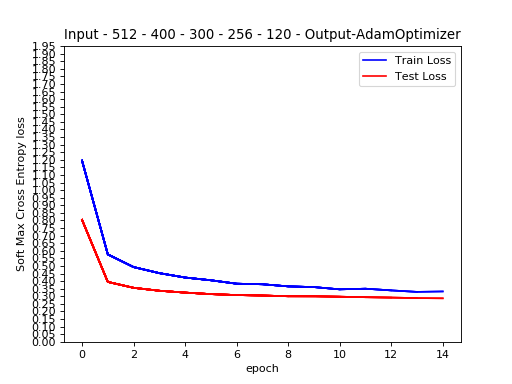

Epoch: 0001 train cost=1.194506458 test cost=0.804093216
Epoch: 0002 train cost=0.576443579 test cost=0.394692531
Epoch: 0003 train cost=0.492618688 test cost=0.355867488
Epoch: 0004 train cost=0.452542177 test cost=0.336408758
Epoch: 0005 train cost=0.423556144 test cost=0.324166406
Epoch: 0006 train cost=0.405551380 test cost=0.314252448
Epoch: 0007 train cost=0.382850613 test cost=0.308017731
Epoch: 0008 train cost=0.379271044 test cost=0.305079957
Epoch: 0009 train cost=0.365308688 test cost=0.300145562
Epoch: 0010 train cost=0.360579442 test cost=0.299883175
Epoch: 0011 train cost=0.345703328 test cost=0.297152522
Epoch: 0012 train cost=0.349890909 test cost=0.293864991
Epoch: 0013 train cost=0.338757699 test cost=0.291350483
Epoch: 0014 train cost=0.328934619 test cost=0.288110378
Epoch: 0015 train cost=0.331887006 test cost=0.286574037
Accuracy: 0.8885


In [120]:
# Since we are using Relu activations in hiden layers we will be using weights that are initalized as weights_relu
ybatchdrop = multilayer_perceptron_batch_dropout(x, weights_relu, biases)

# https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits
cost_batch_drop = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = ybatchdrop, labels = y_))
# https://github.com/amitmac/Question-Answering/issues/2
# there are many optimizers available: https://www.tensorflow.org/versions/r1.2/api_guides/python/train#Optimizers 
optimizer_batch_drop_adam = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_batch_drop)

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') ; ax.set_ylabel('Soft Max Cross Entropy loss')
    xs, ytrs, ytes = [], [], []
    for epoch in range(training_epochs):
        train_avg_cost = 0.
        test_avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)

        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            
            # here we use AdamOptimizer
            _, c, w = sess.run([optimizer_batch_drop_adam, cost_batch_drop, weights_relu], feed_dict={x: batch_xs, y_: batch_ys, keep_prob: 0.5})
            train_avg_cost += c / total_batch
            c = sess.run(cost_batch_drop, feed_dict={x: mnist.test.images, y_: mnist.test.labels,  keep_prob: 1.0})
            test_avg_cost += c / total_batch

        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)
        plt_dynamic(xs, ytrs, ytes, ax,np.arange(0, 2, step=0.05), "Input - 512 - 400 - 300 - 256 - 120 - Output-AdamOptimizer")

        if epoch%display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))

    # plot final results
    plt_dynamic(xs, ytrs, ytes, ax,np.arange(0, 2, step=0.05), "Input - 512 - 400 - 300 - 256 - 120 - Output-AdamOptimizer")

    # we are calculating the final accuracy on the test data
    correct_prediction = tf.equal(tf.argmax(ybatchdrop,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0 }))

# Summary: 

In [122]:
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Framework", "Architecture", "Test Accuracy"]
x.add_row(["Keras", "2 Layer Architecture(Input-256-120-Output)", "0.9787"])
x.add_row(["Keras", "2 Layer Architecture(Input-256-120-Output) with BN and Dropout", "0.9525"])
x.add_row(["Keras", "3 Layer Architecture(Input - 512 - 256 - 120 - Output) with BN and Dropout", "0.9461"])
x.add_row(["Keras", "5 Layer Architecture(Input - 512 - 400 - 300 - 256 - 120 - Output) with BN and Dropout", "0.9424"])
x.add_row(["Tensorflow", "2 Layer Architecture(Input-256-120-Output)", "0.9778"])
x.add_row(["Tensorflow", "2 Layer Architecture(Input-256-120-Output) with BN and Dropout", "0.9799"])
x.add_row(["Tensorflow", "3 Layer Architecture(Input - 512 - 256 - 120 - Output)", "0.9777"])
x.add_row(["Tensorflow", "5 Layer Architecture(Input - 512 - 400 - 300 - 256 - 120 - Output)", "0.8885"])
print(x)

+------------+----------------------------------------------------------------------------------------+---------------+
| Framework  |                                      Architecture                                      | Test Accuracy |
+------------+----------------------------------------------------------------------------------------+---------------+
|   Keras    |                       2 Layer Architecture(Input-256-120-Output)                       |     0.9787    |
|   Keras    |             2 Layer Architecture(Input-256-120-Output) with BN and Dropout             |     0.9525    |
|   Keras    |       3 Layer Architecture(Input - 512 - 256 - 120 - Output) with BN and Dropout       |     0.9461    |
|   Keras    | 5 Layer Architecture(Input - 512 - 400 - 300 - 256 - 120 - Output) with BN and Dropout |     0.9424    |
| Tensorflow |                       2 Layer Architecture(Input-256-120-Output)                       |     0.9778    |
| Tensorflow |             2 Layer Archi